<a href="https://colab.research.google.com/github/padmashree1995/bharat-intern/blob/main/task1_Number_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

In [3]:
data= pd.read_csv("/content/sample_data/mnist_submission.csv")
data= pd.read_csv("/content/sample_data/test.csv")
data= pd.read_csv("/content/sample_data/train.csv")

In [4]:
data.head

<bound method NDFrame.head of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0         1       0       0       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       0       0   
2         1       0       0       0       0       0       0       0       0   
3         4       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
2860      5       0       0       0       0       0       0       0       0   
2861      7       0       0       0       0       0       0       0       0   
2862      6       0       0       0       0       0       0       0       0   
2863      8       0       0       0       0       0       0       0       0   
2864      7       0       0       0       0       0       0       0       0   

      pixel8  ...  pi

In [ ]:
data.shape

(5157, 785)

In [ ]:
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    1
pixel780    1
pixel781    1
pixel782    1
pixel783    1
Length: 785, dtype: int64

In [ ]:
data.duplicated

<bound method DataFrame.duplicated of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0         1       0       0       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       0       0   
2         1       0       0       0       0       0       0       0       0   
3         4       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
5152      3       0       0       0       0       0       0       0       0   
5153      0       0       0       0       0       0       0       0       0   
5154      0       0       0       0       0       0       0       0       0   
5155      9       0       0       0       0       0       0       0       0   
5156      2       0       0       0       0       0       0       0       0   

      pixel8 

In [ ]:
data.tail

<bound method NDFrame.tail of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0         1       0       0       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       0       0   
2         1       0       0       0       0       0       0       0       0   
3         4       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
5152      3       0       0       0       0       0       0       0       0   
5153      0       0       0       0       0       0       0       0       0   
5154      0       0       0       0       0       0       0       0       0   
5155      9       0       0       0       0       0       0       0       0   
5156      2       0       0       0       0       0       0       0       0   

      pixel8  ...  pi

In [ ]:
data.dtypes

label         int64
pixel0        int64
pixel1        int64
pixel2        int64
pixel3        int64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 785, dtype: object

In [ ]:
data.nunique

<bound method DataFrame.nunique of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0         1       0       0       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       0       0   
2         1       0       0       0       0       0       0       0       0   
3         4       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
5152      3       0       0       0       0       0       0       0       0   
5153      0       0       0       0       0       0       0       0       0   
5154      0       0       0       0       0       0       0       0       0   
5155      9       0       0       0       0       0       0       0       0   
5156      2       0       0       0       0       0       0       0       0   

      pixel8  ..

In [ ]:
data.info

<bound method DataFrame.info of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0         1       0       0       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       0       0   
2         1       0       0       0       0       0       0       0       0   
3         4       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
5152      3       0       0       0       0       0       0       0       0   
5153      0       0       0       0       0       0       0       0       0   
5154      0       0       0       0       0       0       0       0       0   
5155      9       0       0       0       0       0       0       0       0   
5156      2       0       0       0       0       0       0       0       0   

      pixel8  ...  

In [ ]:
data.describe

<bound method NDFrame.describe of       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0         1       0       0       0       0       0       0       0       0   
1         0       0       0       0       0       0       0       0       0   
2         1       0       0       0       0       0       0       0       0   
3         4       0       0       0       0       0       0       0       0   
4         0       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
5152      3       0       0       0       0       0       0       0       0   
5153      0       0       0       0       0       0       0       0       0   
5154      0       0       0       0       0       0       0       0       0   
5155      9       0       0       0       0       0       0       0       0   
5156      2       0       0       0       0       0       0       0       0   

      pixel8  ...

In [39]:
data.index

RangeIndex(start=0, stop=42000, step=1)

In [33]:
#import file and reading few lines
data = pd.read_csv("/content/sample_data/train.csv")
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
data.shape

(42000, 785)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [37]:
data.describe(percentiles = [0.05,0.10,0.25,0.50,0.75,0.90,0.99])

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
5%,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
90%,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [38]:
#checking for null values
round(100*(data.isnull().sum()/(len(data.index))),2).sort_values(ascending = False)

label       0.0
pixel515    0.0
pixel517    0.0
pixel518    0.0
pixel519    0.0
           ... 
pixel263    0.0
pixel264    0.0
pixel265    0.0
pixel266    0.0
pixel783    0.0
Length: 785, dtype: float64

In [40]:
# let us check unique entries of label column
np.unique(data['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [42]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

11490434/11490434 [==============================] - 0s 0us/step


prepare Dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


Create Model

In [ ]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

Compile Model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 64)          9

In [ ]:
epochs = 2
history = model.fit(
  train_images,
  train_labels,
  epochs = epochs
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 238s 126ms/step - loss: 0.1314 - accuracy: 0.9582
Epoch 2/2
1875/1875 [==============================] - 233s 124ms/step - loss: 0.0440 - accuracy: 0.9863


Visualize Training Results

Text(0.5, 1.0, 'Training Accuracy and Loss')

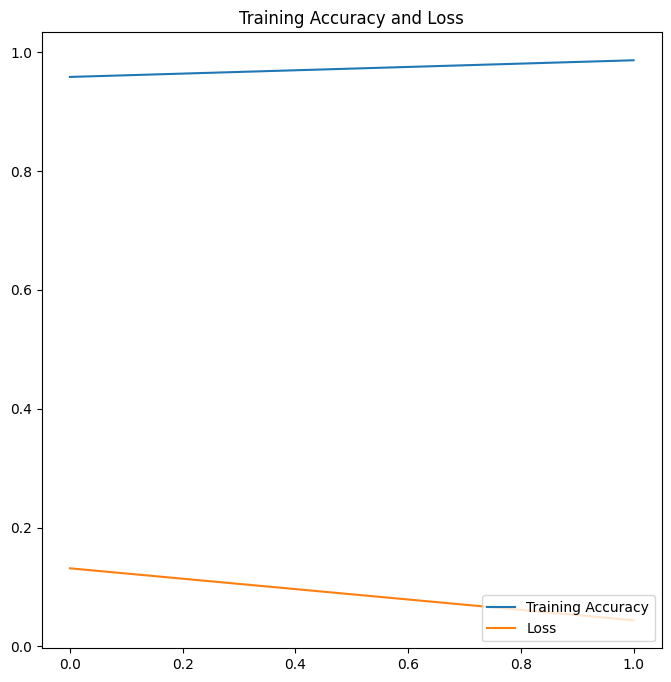

In [ ]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

<Axes: ylabel='count'>

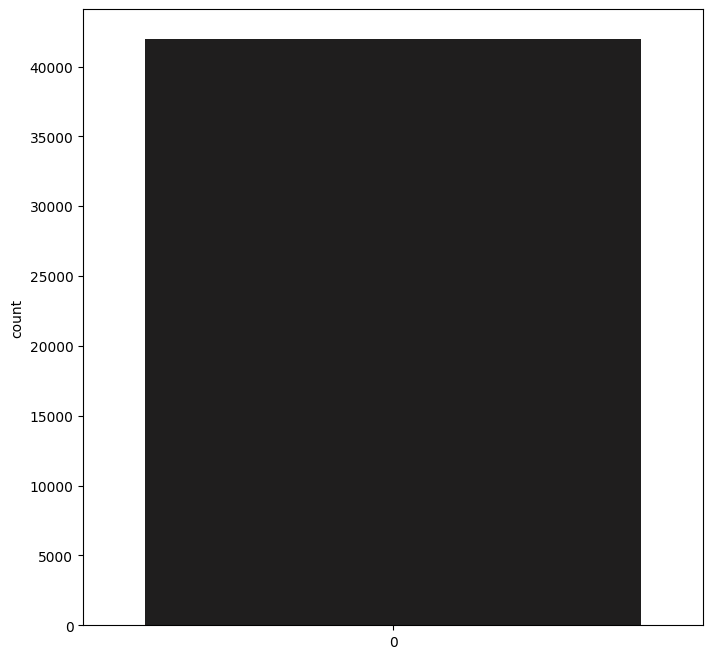

In [46]:
#visualising the column - label
import seaborn as sns
plt.figure(figsize=[8,8])
sns.countplot(data['label'],palette = 'icefire')

Text(0, 0.5, 'Frequency')

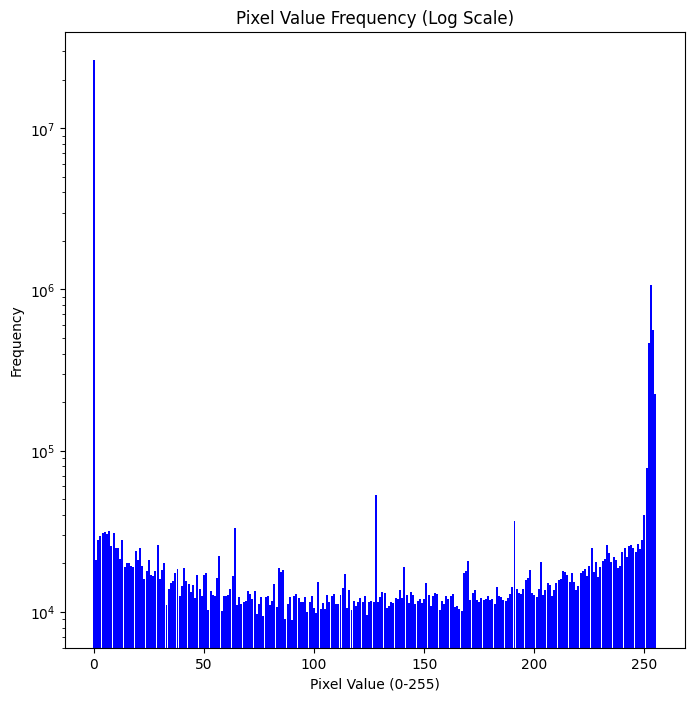

In [45]:
y = pd.value_counts(data.values.ravel()).sort_index()
N = len(y)
x = range(N)
width =0.9
plt.figure(figsize=[8,8])
plt.bar(x, y, width, color="blue")
plt.title('Pixel Value Frequency (Log Scale)')
plt.yscale('log')
plt.xlabel('Pixel Value (0-255)')
plt.ylabel('Frequency')

<ipython-input-52-a423357b63d2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['pixel656'])


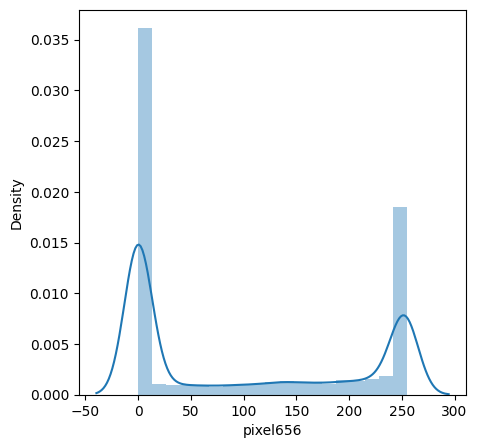

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.distplot(data['pixel656'])
plt.show()

<Axes: xlabel='label', ylabel='pixel383'>

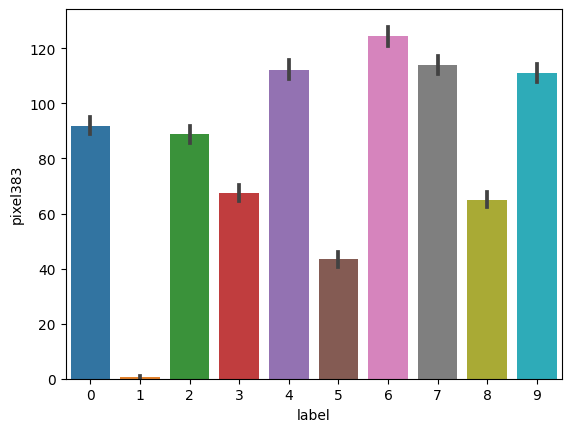

In [54]:
import seaborn as sns
sns.barplot(x='label', y='pixel383', data= data)

0

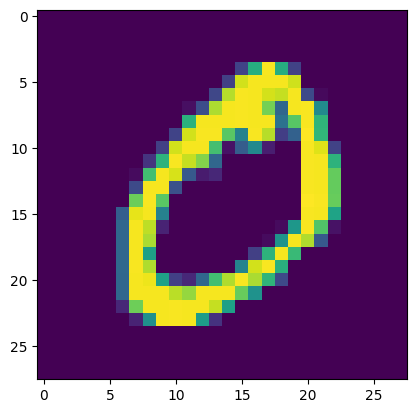

In [ ]:
plt.imshow(train_img[1])
train_lab[1]

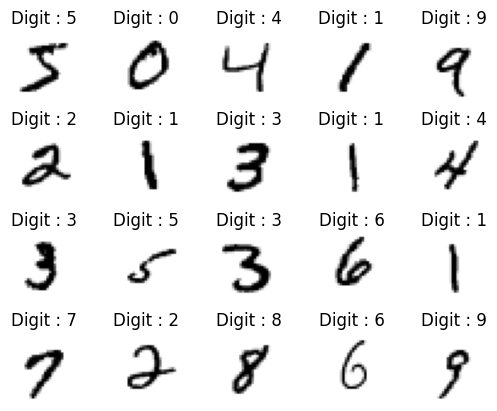

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap='gray_r')
  plt.title("Digit : {}".format(train_lab[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

In [ ]:
print('Training images shape : ',train_img.shape)
print('Testing images shape : ',test_img.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [17]:
images = test_img[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_img in enumerate(images, start=1):

    org_image = test_img
    test_img = test_img.reshape(1,28,28,1)
    prediction =model.predict_classes(test_img, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

Test images array shape: (0, 28, 28)


In [ ]:
model.save('finalproject.h5')

In [ ]:
model.load_weights('finalproject.h5')
#compiling the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

1/1 [==============================] - 0s 39ms/step
Predicted Value:  1
Unsuccessful prediction


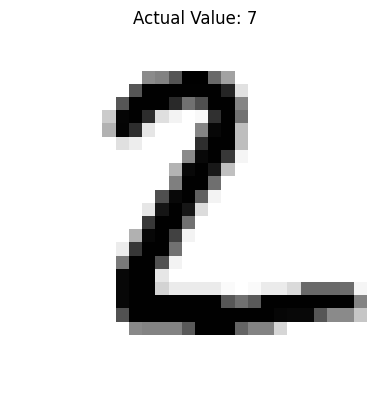

In [ ]:
plt.imshow(test_img[0],cmap='gray_r')
plt.title('Actual Value: {}'.format(test_lab[0]))
prediction=model.predict(test_img)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[0]))
if(test_lab[0]==(np.argmax(prediction[0]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

In [ ]:
from IPython.display import Image
Image(test_img[0],width=150,height=110)
plt.imshow(test_img[0],cmap='gray_r')

In [96]:
from keras.models import load_model

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

GUI

In [7]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [8]:
import gradio as gr

In [5]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred

In [94]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")


In [2]:
from keras.datasets import mnist
objects=mnist
(train_img,train_lab),(test_img,test_lab)=objects.load_data()

0

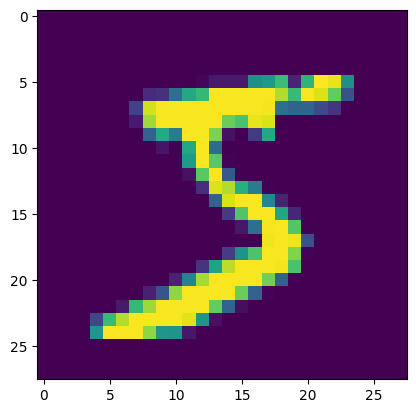

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_img[0])
train_lab[1]

In [7]:
train_img=train_img/255.0
test_img=test_img/255.0

In [8]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model=Sequential()
input_layer= Flatten(input_shape=(28,28))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_img,train_lab,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1083 - accuracy: 0.9667
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0653 - accuracy: 0.9795
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0495 - accuracy: 0.9841
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0388 - accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0282 - accuracy: 0.9904


In [14]:
model.save('finalproject.h5')

In [18]:
model.load_weights('finalproject.h5')
#compiling the model
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('digit_model.h5')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 [==============================] - 177s 375ms/step - loss: 2.2845 - accuracy: 0.1614 - val_loss: 2.2538 - val_accuracy: 0.3386
Epoch 2/10
469/469 [==============================] - 172s 366ms/step - loss: 2.2298 - accuracy: 0.2969 - val_loss: 2.1837 - val_accuracy: 0.5880
Epoch 3/10
469/469 [==============================] - 176s 375ms/step - loss: 2.1545 - accuracy: 0.4138 - val_loss: 2.0852 - val_accuracy: 0.6792
Epoch 4/10
469/469 [==============================] - 174s 372ms/step - loss: 2.0526 - accuracy: 0.4870 - val_loss: 1.9512 - val_accuracy: 0.7330
Epoch 5/10
469/469 [==============================] - 171s 365ms/step - loss: 1.9158 - accuracy: 0.5378 - val_loss: 1.7755 - val_accuracy: 0.7545
Epoch 6/10
469/469 [==============================] - 174s 371ms/step - loss: 1.7440 - accuracy: 0.5777 - val_loss: 1.5660 - val_accuracy: 0.7725
Epoch 7/10
469/469 [==============================]

In [32]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.11
    Uninstalling flax-0.6.11:
      Successfully uninstalled flax-0.6.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xarray 2022.12.0 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.


In [33]:
!tensorflowjs_converter --input_format keras "digit_model.h5" "./model"

2023-06-30 16:23:08.063098: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
